# Sampling from Distributions

Let us start by recapping where we are:  We have met both generic and some particular *named* distributions that model situations, and in the case of *named* distributions that have sufficient structure or symmetry that we can compute with them.

A couple of problems then confront us:  In reality we rarely know the distribution or we may know the *type* of distribution but not the exact parameters for a random variable, and our only way to gather information about the distribution is to sample from it. 

An analogy:  We are trying to identify a movie. Maybe we know it is a spy thriller. But otherwise all we have are some still images from it. How many images would we need to identify the movie? 

We will take class to sample from our *named* distributions and see what happens. I'll give one example here to illustrate the method:  Consider a shopping center where on average 2 customers arrive at the chashiers every minute. The number of customers $Y$ that will arrive at the cashiers in a minute is then a random variable given by the Poisson distribution:  

$$ P(Y=x) = \frac{2^r}{r!} e^{-2} $$

Suppose we measure the number of customers arriving each minute for 5 minutes:

In [2]:
sample <- rpois(5, 2)
sample

[1] 2 3 2 2 3

Some questions:

- What is the mean number of customers in our sample?
- What do we get as we increase the size of the sample?


In [6]:
sample <- rpois(200, 2)
mean(sample)

[1] 1.92

The histogram of our sample from the Poisson Distribution, looks more like the Poisson Distribution itself as the sample size increases.

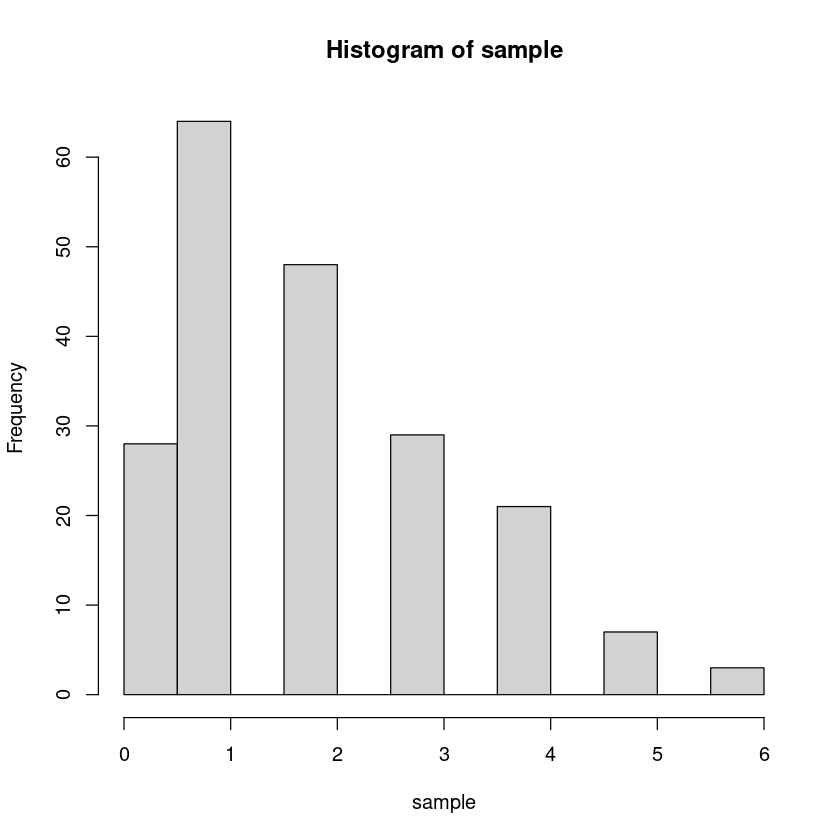

In [7]:
hist(sample, 20)

Suppose we were to treat the mean of the sample $\bar{Y}$ as a random variable itself. Fix the size of the sample and see what we get if we run the experiment many times, what shape do you see in the histogram for values of $\bar{Y}$ and what happens to that shape as the size of the sample is then increased?

Before you run the experiment, generate a hypothesis. What will we get as we run the experiment more?  What will we get as we increase the size of the sample? Then as you run the experiment revise your hypothesis.

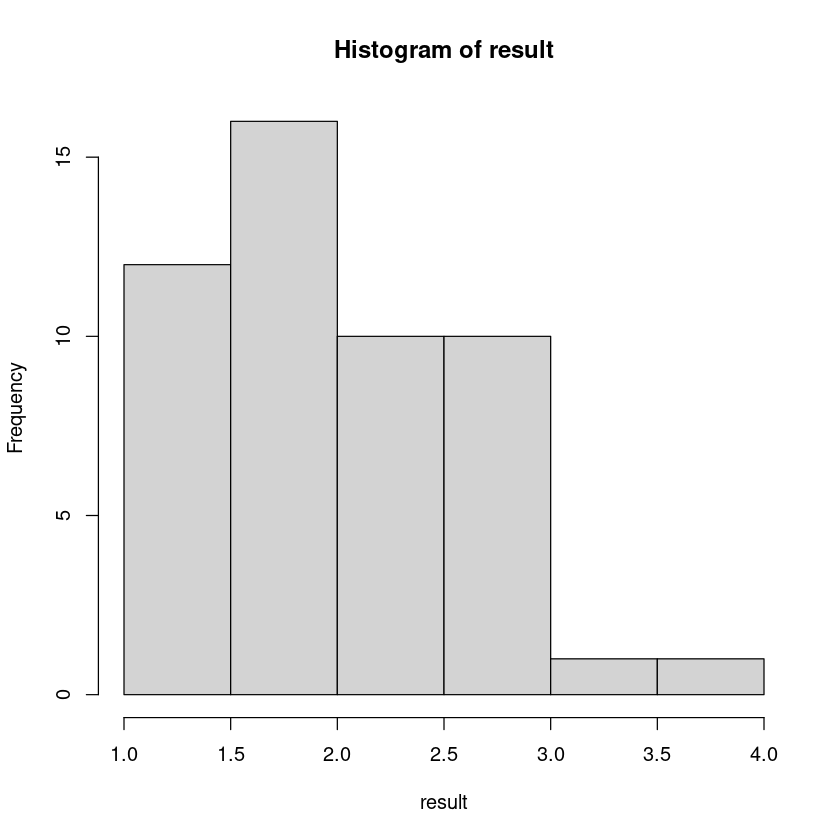

In [8]:
result <- c()
for (k in 1:50) {
    result <- c(result, mean(rpois(5, 2)) )
}
hist(result)

## Sampling

Run the experiment above with a variety of our named distributions including the normal distribution. What is happening?  Can you develop a hypothesis?

## Multivariate Distributions

In an effort to make our hypothesis we have develop precise, we need to build up some langauge for modeling this situation. 

A *multivariate distribution* is defined to be a distribution on multiple random variables describing the likliehood that values of them will come together. Explicitly given a set of discrete random variables $Y_1, Y_2, \dots, Y_n$ we can define their joint probability distribution by:  $P(Y_1 = x_1, Y_2 = x_2, \dots, Y_n = x_n) $ to be the probability that each of the $Y$s has the given value.

In the continuous case, we need to proceed as we did before:  We define the joint cummulative distribution by:

$$ F(x_1, x_2, \dots, x_n) = P( Y_1 \leq x_1, Y_2 \leq x_2, \dots, Y_n \leq x_n) $$

and then the joint probability density function is given by:

$$ f(x_1, x_2, \dots, x_n) = \frac{\partial^n F}{\partial x_1 \partial x_2 \dots \partial x_n}$$

Again do not fall for the trap of thinking about the density as the distribution:  the values of $f$ do not give the likliehood of a particular outcome.

### Marginal Probability

Given two discrete random variables $Y_1$ and $Y_2$: we define the marginal probability of $Y_1$ to be the total likliehood that $Y_1$ occurs.

$$ P(Y_1 = x_1) = \sum_{x_2} P(Y_1 = x_1, Y_2 = x_2) $$ 

In the continuous case the marginal PDF for $Y_1$ is found by:

$$ f_1(x_1) = \int f(x_1, x_2) dx_2 $$

### Conditional Probability

Consider two discrete random variables: We define the conditional probability $P(Y_1=x_1 | Y_2 = x_2)$, the probability that $Y_1 = x_1$ given that we have observed that $Y_2 = x_2$. This can be compute by recognizing that the likliehood of $Y_1$ occuring given a value for $Y_2$ is the likliehood that both values occured randomly divided by the marginal probablity of $Y_2$:

$$ P(Y_1 = x_1 | Y_2 = x_2) = \frac{P(Y_1 =x_1, Y_2 = x_2)}{P(Y_2 = x_2)}$$

In other words the conditional probability given $Y_2=x_2$ is the proportion of the time that $Y_1=x_1$ occured out of all cases where $Y_2 = x_2$ occured.

In the continuous case, the conditional PDF is found by:

$$ f(x_1 | x_2) = \frac{f(x_1, x_2)}{ f_2(x_2) } $$

### Idependent Random Variables

Consider the case of two discrete random varialbes with distribution $P(Y_1 = x_1, Y_2 = x_2)$. The two variables are independent if the likliehood of them both occuring is just the product of each one indvididually occuring (the marginal probabilities of each):  

$$ P(Y_1 = x_1, Y_2 = x_2) = P(Y_1 = x_1) P(Y_2 = x_2) $$

equivalently what we are saying is that the variables are independent if conditioning by one of them just gives the marginal likliehood:

$$ P(Y_1 = x_1 | Y_2 = x_2) = P(Y_1 = x_1) $$

In the continuous case, indepdent random variables have a joint PDF that is just a product of marginal PDFs:

$$ f(x_1, x_2) = f_1(x_1) f_2(x_2) $$

or in terms of the conditional PDF we will have:

$$ f(x_1 | x_2) = f_1(x_1) $$

Again the idea is that if the variables are independent, knowing the value we got for one of them should not change our probability density of the other one. 

#### Example

Find the constant $c$ such that 

$$ f(x_1, x_2) = \left\{ \begin{matrix} C x_1 x_2 & 0 \leq x_1, x_2 \leq 1 \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

is a valid PDF. Are $x_1$ and $x_2$ indepdent?

#### Example 2

Find the constant $c$ such that 

$$ f(x_1, x_2) = \left\{ \begin{matrix} C x_1 x_2 & 0 \leq x_1 < x_2 \leq 1 \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

is a valid PDF. Are $x_1$ and $x_2$ indepdent?

Reminder:  You can use wolfram alpha to compute the integral, but you may need to think about how to set it up correctly. You could determine independence/dependence without actually doing the integral if you appeal to the meaning of the definitions above.

## Correlation and Covariance

Given a pair of jointly distributed continuous random variables $Y_1$ and $Y_2$ one measure of their dependence is to ask how far they jointly move from the means. Let 

$$ \mu_1 = E(Y_1) \qquad \mbox{and} \qquad \mu_2 = E(Y_2) $$ 

we have the variances

$$ \sigma_1^2 = E( (Y_1 - \mu_1)^2) \qquad \mbox{and} \qquad \sigma_2^2 = E( (Y_2 - \mu_2)^2 ) $$ 

which again measure the extent to which $Y_1$ (resp. $Y_2$) is likely to be far from its mean.

However, it is also interesting to ask how far $Y_1$ will stray from its mean while $Y_2$ is simmultaneously measured from its mean. We defin the covariance of $Y_1$ and $Y_2$ to be

$$ \mbox{Cov}(Y_1, Y_2) = E( (Y_1 - \mu_1) (Y_2 - \mu_2) ) $$

Note that if $Y_1$ and $Y_2$ are independent then 

$$ \mbox{Cov}(Y_1, Y_2) = E( (Y_1 -\mu_1) ) E( (Y_2 - \mu_2) ) = 0 \cdot 0 = 0 $$

The units of $\mbox{Cov}(Y_1, Y_2)$ are the products of the two units. Which means that this is not an absolute measure of the correlations between two varaibles; for example if one of the variables has a large variance it will mean a larger covariance even if the correlation is weak. We can get something that is unitless by dividing this by the square root of the product of variances. The *coefficient of correlation* is given by

$$ \rho = \frac{\mbox{Cov}(Y_1, Y_2)}{\sqrt{ V(Y_1) V(Y_2) }}  $$

### Algebra

Some algebra of the expected values gives:

$$ \mbox{Cov}(Y_1, Y_2) = E( Y_1 Y_2) - E(Y_1) E(Y_2) $$

and so one way to think about covariance is that it is measuring how far the expected value of the product varies from what it would be if the variables were not correlated.


### Example

Be careful no correlation does not imply independence. Consider the joint density:

$$ f(x_1, x_2) = \left\{ \begin{matrix} C & -1 < x_1 < 0; \qquad 0 < x_2 < 1 + x_1 \\ C & 0 < x_1 < 1; \qquad 0 < x_2 < 1-x_1 \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

Show that for two random variables $Y_1$ and $Y_2$ with this join distribution $\mbox{Cov}(Y_1, Y_2) = 0$ but that $Y_1$ and $Y_2$ are dependent. 

### Linear Combinations of Independent Random Variables

Suppose that $Y_1, \dots, Y_n$ are independent random variables with $E(Y_i) = \mu_i$ and $V(Y_i) = \sigma_i$. Let $U = \sum a_i Y_i $ and $V = \sum b_i Y_i$ for some coefficients $a_i$ and $b_i$. What can you say about 

- $ E(U)$ and $E(V)$?
- $ V(U)$ and $V(V)$?
- $\mbox{Cov}(U, V)$?

- when will $U$ and $V$ have no correlation?
- when will $U$ and $V$ be independent?
- when will $U$ and $V$ have no correlation but be dependent?

#### Example

Supppose $Y$ is a normal random variable with mean $\mu$ and variance $\sigma^2$. Show that 

$$ Z = \frac{Y - \mu}{\sigma} $$

is a normal random variable with mean 0 and variance 1.

## Random Sampling

This then brings us back to our sampling question. We can think of a random sample from a distribution, $Y_1, Y_2, \dots, Y_n$ as a multivariate distribution of independent identically distributed random variables. 

If the $Y_i$ are discrete with distribution $P(Y = x) = p(x)$ then:

$$ P(Y_1 = x_1, Y_2 = x_2, \dots, Y_n = x_n) = p(x_1) p(x_2) \dots p(x_n) $$ 

If the $Y_i$ are continuous with PDF $f(x)$ then:

$$ f(x_1, x_2, \dots, x_n) = f(x_1) f(x_2) \dots f(x_n)$$

We can then answer questions like:  

### Mean of the sample

The mean of the sample is given by:

$$ \bar{Y} = \frac{1}{n} Y_1 + \frac{1}{n} Y_2 + \dots + \frac{1}{n} Y_n $$

Suppose we are in the continuous case, and we want to know what the distribution of $\bar{Y}$ is?

Well its the same trick we have used over-and-over, we compute the CDF and then differentiate:

$$ F(x) = P( \bar{Y} < x ) = \iint \dots \int_{x_1 + x_2 + \dots + x_n \leq n x} f(x_1) f(x_2) \dots f(x_n) dx_1 dx_2 \dots dx_n $$

Okay so there is not much to do unless we have an explicit value for the PDF, and even then it is likely to get hairy quickly. However two points (a) it is exaclty a problem that a symbolic computer system is good at, and (b) it should not be surprising that we can compute with this. 

We will do one example:

#### Example

Using the linear combination result from above what can you say about $E(\bar{Y})$ and $V(\bar{Y})$? 

We will call $\bar{Y}$ a point estimator for $\mu = E(Y)$. 

#### Sample from a Normal Distribution

Let $Y_1$ and $Y_2$ be random samples from the Standard Normal distribution ( the normal distribution with mean 0 and variance 1). 

The PDF for each is:

$$ f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2} $$

If the mean of the sample is then $\bar{Y} = \frac12 Y_1 + \frac12 Y_2 $ then the CDF for the mean is:

$$ F(x) = \iint_{x_1 + x_2 < 2 x} \frac{1}{2\pi} e^{-x_1^2/2 - x_2^2/2} dx_1 dx_2 $$

We can set up this itereated integral by fixing an $x_1$ and then integrating over all $x_2$ values such that the inequality holds, and then integrating over all possible $x_1$ values:

$$ F(x) = \frac{1}{2\pi} \int_{-\infty}^\infty dx_1 e^{-x_1^2/2} \int_{-\infty}^{2x - x_1} dx_2 e^{-x_2^2/2} $$

Of course we don't actually care what this is, because what we want to do is differentiate it to get the PDF. Notice that the $x$ dependence is confined to just one bound on the iterated integral. We get:

$$ f(x) = \frac{dF}{dx} = \frac{1}{\pi} \int_{-\infty}^\infty dx_1 e^{-x_1^2/2} e^{-(2x - x_1)^2/2} = \frac{1}{\pi} \int_{-\infty}^\infty dx_1 e^{-2x^2 + 2x x_1 - x_1^2} $$

If we complete the square in the exponent we get:

$$ - ( x_1^2 - 2 x x_1) - 2 x^2 = - ( x_1 -x)^2 - x^2 $$

Then the integral is just the normalizing constant for a normal random variable with variance $\sigma^2 = 1/2$ and mean $\mu = x$ and so it gives $\sqrt{\pi}$. Therefore we have

$$ f(x) = \frac{1}{\sqrt{pi}} e^{- x^2} $$ 

Which is the PDF for a normal distribution with mean 0 and a variance of $1/2$.

### General Result

It's not surprising then that the above result generalizes to a sample of size $n$:  Let $Y_1, Y_2, \dots, Y_n$ be a sample from a normal distribution with mean $\mu$ and variance $\sigma^2$. Then the sample mean

$$ \bar{Y} = \frac1n Y_1 + \frac1n Y_2 + \dots + \frac1n Y_n $$

is a random variable given by a normal distribution with mean $\mu$ and **variance** $\sigma^2 / n$.  

In particular as we increase the size of the sample, the variance decreases as $1/n$. 

The proof is just setting up the multi integral like we did above and then differentiating it, it is interesting, but not terribly enlightening so we will skip it.


## Central Limit Theorem

So let's return to our hypothesis. It was looking like, at least in the cases we were experimenting with that things became more normal as the size of the sample increased. It is one of the highlights of this subject that this is in fact a theorem.

### Moment Convergence Theorem
First we need a workhorse theorem about the relationship between moment generating functions converging and the random variables they describe:

Let $Y, Y_1, Y_2, \dots, $ be random variables with moment generating functions 

$$ m_j(t) = E( e^{ t Y_j}) $$

and 

$$ m(t) = E( e^{t Y} ) $$

Then if the moment generating functions converge to $m$:  $$ \lim_{n\to \infty} m_n(t) = m(t) $$ then the distribution for $Y_n$ converges to the distribution of $Y$.

### Central Limit Theorem

The central limit theorem is then that if $Y_1, Y_2, \dots, Y_n$ are independent identiically distributed random variables with $E(Y_i) = \mu$ and $V(Y_i) = \sigma^2 < \infty$ let 

$$ U_n = \frac{\bar{Y} - \mu}{\sigma/\sqrt{n}} $$

Then the distribution of $U_n$ converges to the standard normal distribution as $n\to \infty$. 

Explicitly:

$$ \lim_{n\to \infty} P(U_n \leq u) = \int_{-\infty}^u \frac{1}{\sqrt{2\pi}} e^{-t^2/2} dt $$ 

Note how few assumptions we have on the distribution the $Y_i$ are pulled from. They could even be discrete, hence the reason we have to phrase the last formula in terms of the CDF.

#### Proof

This is such a powerful result (it really feels to me like more than we deserve) and as such I want to give a proof of it here:

Define

$$ Z_i = \frac{Y_i - \mu}{\sigma} $$ 

and then note that we have:

$$ U_n = \frac{1}{\sqrt{n}} \sum_{i=1}^n Z_i $$

The $Z_i$ are idependent identically distributed random variables with mean 0 and variance 1 (note that they are not necessarily normal unless the $Y$ are normal). Since they are indepdent their moment generating functions multiply and are equal:

$$ m_{\sum Z_i}(t) = m_{Z_1}(t) m_{Z_2}(t) \cdots m_{Z_n}(t) = m_Z(t)^n $$

Therefore 

$$ m_{U_n}(t) = m_Z(\frac{t}{\sqrt{n}})^n $$

We use Taylors Theorem from Calculus 2:

$$ m_Z(t) = m_Z(0) + m'_Z(0) t + m''_Z(\xi) \frac{t^2}{2} $$

for some $0 < \xi < t $.

We have $m_Z(0) = E( e^{0 Z} ) = E( 1) = 1 $ and $m'_Z(0) = E( Z) = 0 $ and so 

$$ m_Z(t) =1 + m''_Z(\xi) \frac{t^2}{2} $$ 

Therefore:

$$ m_{U_n}(t) = \left[ 1 + m''_Z(\xi_n) \frac{t^2}{2n} \right]^n $$

where now $0 < \xi_n < t / \sqrt{n}$.  Note that as $n\to \infty$ the $\xi_n$ gets pinched to 0 and therefor 

$$ m''_Z(\xi_n) t^2 /2 \to m''_Z(0) t^2 / 2 = E(Z^2) t^2/2 = t^2/2 $$ 

because the variance is 1 and the mean is 0:  $ V(Z) = E(Z^2) - E(Z)^2 $

Recall that if $\lim_{n\to \infty} b_n = b $ then

$$ \lim_{n\to \infty} ( 1 + \frac{b_n}{n} )^n = e^b $$

and we have that the moment generating functions converge to the moment generating function of the standard normal regardless of what the underlying distribution for the sample is!

$$ \lim_{n\to \infty} m_{U_n}(t) = \lim_{n\to \infty} \left[ 1 + \frac{m''_Z(\xi_n) t^2/2}{n} \right]^n = e^{t^2/2} $$

#### When does CLT not apply?

With a theorem as powerful as CLT it is important to think about the cases when it does not apply. There are three related clues:  We need to have an mean and a variance so $E(Y)$ and $E(Y^2)$ need to exist. And not that the proof relied on there being a moment generating function so we need to know that the function 

$$ m_Y(t) = E( e^{tY}) $$

exists and has a second derivative for some open interval containing $t=0$. This condition will also give us the existence of the mean and variance. 

So what random variables do not have moment generating functions? 






## Using CLT

So let's now take a look at how we can use the Central Limit Theorem:

Suppose we are looking for how much the price of gas is changing in our city. Earlier in this course we sampled a few of the gas stations near us:  we have found through many observations that the variance of gas prices is around $0.32^2$ dollars squared per gallons squared. We sample 10 stations nearby and find that the mean price *of the sample* is 2.98 dollars per gallon. 

We do not know what the distribution of gas prices is, though we suspect it could be normal, but CLT tells us it does not matter if we are interested in the mean price of gas provided that the sample size is getting large - we do have a question of whether 10 is large enough.

Assuming that $\bar{Y}$ is approximately normal, let's find an interval in which we are 95% confident the population mean $\mu$ is contained. 

The variable 

$$ Z = \frac{\bar{Y} - \mu}{ \sigma/\sqrt{n}} = \frac{2.98 - \mu}{0.32 / \sqrt{10}} $$

is then approximately a standard normal random variable. We can find an interval centered at 0 in which we are 95% of the time we do this experiment we will find the value of $Z$. 

If we want the interval $(-a, a)$ to have 0.95 of the porbability:

$$ \int_{-a}^a \frac{1}{\sqrt{2\pi}} e^{-x^2/2} dx = 0.95 $$

then we want the tails of this integral to have 0.05 together or 0.025 each:

$$ \int_{-\infty}^{-a} \frac{1}{\sqrt{2\pi}} e^{-x^2/2} dx = \int_{a}^{\infty} \frac{1}{\sqrt{2\pi}} e^{-x^2/2} dx = 0.025 $$

In other words $-a$ is the value for which the CDF gives 0.025. We can use the R command *qnorm* to take the inverse of the CDF and find $-a$:





In [9]:
qnorm(0.025, 0, 1)

[1] -1.959964

In [10]:
# It's a compute so lets use it to keep track of a

a = - qnorm(0.025, 0, 1)
a

[1] 1.959964

In [14]:
# I always check that I used the inverse correctly and check the tails
1 - pnorm(a, 0, 1)

[1] 0.025

In [15]:
pnorm(-a, 0, 1)

[1] 0.025

In [16]:
# we can also check the interior

pnorm(a, 0, 1) - pnorm(-a, 0, 1)

[1] 0.95

So we have: 

$$0.95 = P( -a < Z < a)= P( -a < \frac{2.98 - \mu}{0.32 / \sqrt{10}} < a) $$

and we can then solve this for an inequality bounding $\mu$ in an interval:


In [17]:
2.98 - a*0.32 / sqrt(10); 2.98 + a*0.32 / sqrt(10)

[1] 2.781666

[1] 3.178334

### What do we mean by 95% confident

Our statement is that we are 95% confident that $\mu$ lies between these two numbers (a quick check is to verify that our sample mean is between these values). What we mean by this is that if we were to repeat the experiment:  sample 10 gas stations for their price with nothing else changing, we would 95% of the time (if we did it enough) find an interval that contains $\mu$. It is a sort of a statement about how likely it is that we have made the wrong conclusion.

Of course there are some assumptions we've made:  

- We assumed that the sample was a random sample of independent identically distributed random variables. Was it?
- We assumed that with a sample of size 10 the normal approximation to $\bar{Y}$ would be accurate. Is it?
- We assumed that variance we had computed over time was the variance of our distribution. Is it?

This last point is a bit sticky. Frequently we will not know our variance and will have to approximate it from the sample itself. We will come back to this.

### Some questions

1. What happens if you decrease or increase our confidence level?

2. What happens if we decrease or increase our sample size?

3. How large of a sample would we need to know that we have the mean price to within 0.05 dollars with 95